# Exemplos - leitura de imagens com a OpenCV

Tópicos 

* [Leitura e exibição de imagens no notebook](#leitura)
* [Conversão entre tipos de cor](#conversao)
* [Separação de canais em R,G,B](#canais)

In [4]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.2.0 


A biblioteca *OpenCV*é importada no Python com `import cv2`.

A versão ideal para esta disciplina é a *OpenCV 4*, que também se chama `cv2` (não existe `cv4`)

O `print` acima vai dizer a versão que você tem.


<div id="leitura"></div>

# Leitura e exibição de imagens

A função `cv2.imread` lê imagens de um arquivo. 

In [5]:
grid = cv2.imread("img9x9.png")

Vamos realizar uma conversão de tipos entre `BGR` e `RGB` usando a função cvtColor. 

In [6]:
grid_rgb = cv2.cvtColor(grid, cv2.COLOR_BGR2RGB)

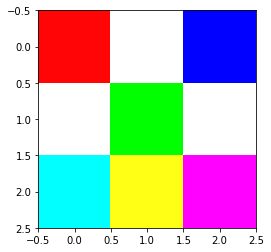

In [9]:
plt.imshow(grid_rgb,interpolation="none")

## Imagens como matrizes

No OpenCV as imagens são matrizes do numpy. Note que a 

In [10]:
type(grid_rgb)

numpy.ndarray

In [11]:
grid_rgb

array([[[255,   5,   5],
        [255, 255, 255],
        [  1,   1, 255]],

       [[255, 255, 255],
        [  1, 255,   1],
        [255, 255, 255]],

       [[  2, 255, 255],
        [255, 255,  21],
        [255,   1, 255]]], dtype=uint8)

Note que o *tipo* 'uint8'  quer dizer *unsigned int de 8 bits*. Ou seja, é capaz de representar entre $0$ e $2^{8}-1=255$

Esta informação é importante quando manipularmos os bits da imagem. É preciso ter certeza de que não vai ocorrer *overflow* - atribuir valores que o tipo não suporte

## Transposta de uma matriz

Precisamos especificar na transposta a ordem em que esperamos que as dimensões da imagem original apareçam. O padrão da OpenCV para a ordem das dimensões é `0=linhas`,  `1=colunas` e `2=componentes de cor`. O que queremos é uma transposta de linhas e colunas, portanto deve ficar como abaixo:

In [12]:
trans = grid_rgb.transpose((1,0,2))

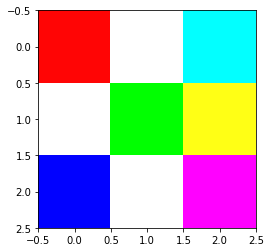

In [13]:
plt.imshow(trans,interpolation="none")

Note que a imagem acima teve linhas e colunastranspostas

In [14]:
arara = cv2.imread("arara_medium.jpg")

O atributo `shape` traz as dimensões da matriz

In [15]:
arara.shape

(333, 500, 3)

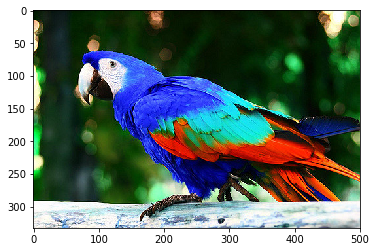

In [16]:
plt.imshow(arara)

Vamos transpor também a imagem da arara

In [17]:
trans_arara = arara.transpose((1,0,2))

In [18]:
arara.shape

(333, 500, 3)

In [19]:
trans_arara.shape

(500, 333, 3)

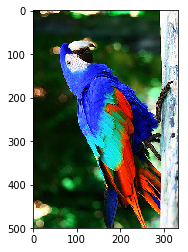

In [20]:
plt.imshow(trans_arara)

<div id="conversao">

## Conversão entre tipos de cor

Na OpenCV a função cv2.cvtColor faz a conversão entre tipos de cor. No caso vamos converter de BGR para RGB

In [21]:
arara_rgb = cv2.cvtColor(arara, cv2.COLOR_BGR2RGB)

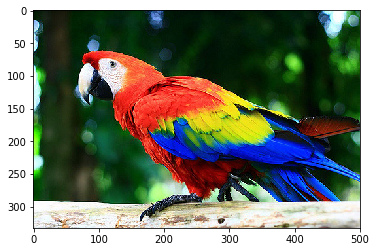

In [22]:
plt.imshow(arara_rgb)

In [23]:
arara_rgb.shape

(333, 500, 3)

<div id=canais>

# Separando os canais da imagem

A terceira dimensão é a das componentes de cor. Nesta dimensão podemos separar R,G e B usando os índices

Canal vermelho

In [24]:
arara_r = arara_rgb[:,:,0]

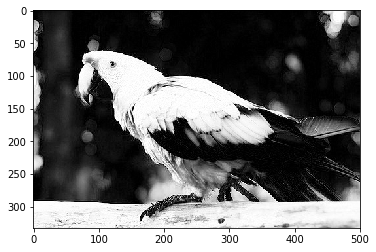

In [25]:
plt.imshow(arara_r, cmap='Greys_r')

Canal verde

In [26]:
arara_g = arara_rgb[:,:,1]

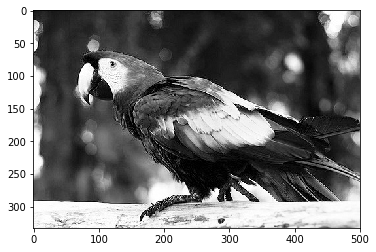

In [27]:
plt.imshow(arara_g, cmap='Greys_r')

Canal azul

In [28]:
arara_b = arara_rgb[:,:,2]

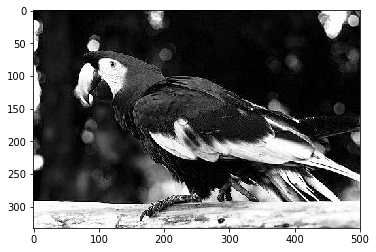

In [29]:
plt.imshow(arara_b, cmap='Greys_r')

# Input da webcam

Devemos usar cv2.VideoCapture para ler de câmeras e arquivos de vídeo

In [30]:
webcam = cv2.VideoCapture(0) # Tente vários IDs para descobrir qual é em sua webcam

In [31]:
t.sleep(3) # Espera a webcam ficar pronta

A função que de fato lê é a `read()`

In [32]:
val, image = webcam.read()

In [33]:
val  # Checa se um frame chegou

True

In [34]:
webcam.release() # fecha a webcam

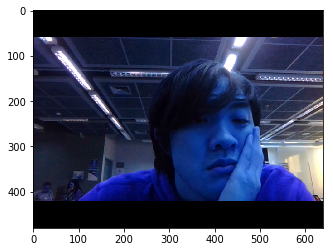

In [35]:
plt.imshow(image)

In [36]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Vamos ver a imagem

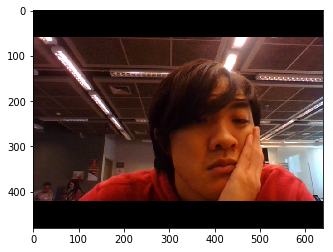

In [37]:
plt.imshow(image_rgb)